<a href="https://colab.research.google.com/github/AlanSede24/DS1-project/blob/main/ProyectoDS_Parte1_SedeAlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis sobre Reservas de Hotel: Exploración de Cancelaciones

## Disparadores de investigación
1. ¿Cuál es el porcentaje de reservas canceladas en comparación con las no canceladas?
2. ¿El lead time (días de anticipación en la reserva) influye en la cancelación de una reserva?
3. ¿Cómo se distribuyen los precios promedio de las habitaciones y su relación con las cancelaciones?
4. ¿Los huéspedes que hacen solicitudes especiales tienen menos probabilidades de cancelar la reserva?
5. ¿Qué variables numéricas están más correlacionadas entre sí?
6. ¿Cuál es la probabilidad de cancelación para los diferentes segmentos de mercado?

### Importación de Librerias

In [15]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Lectura del Dataset

In [16]:
# Cargar el dataset desde la URL cruda de GitHub
url = 'https://raw.githubusercontent.com/AlanSede24/DS1-project/refs/heads/main/data/Hotel-Reservations.csv'
df = pd.read_csv(url, sep=';')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Resumen y Descrición del Dataset

In [51]:
# Información del dataset
df.info()

# Verificar valores nulos
print(f'\nCantidad total de valores nulos: {df.isnull().sum().sum()}\n')

# Estadísticas descriptivas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


### Configuración Visual Global para los Gráficos

In [53]:
plt.style.use('ggplot')  # Estilo de matplotlib
sns.set(style='whitegrid', palette='pastel')  # Estilo de seaborn

### Visualizando Outliers

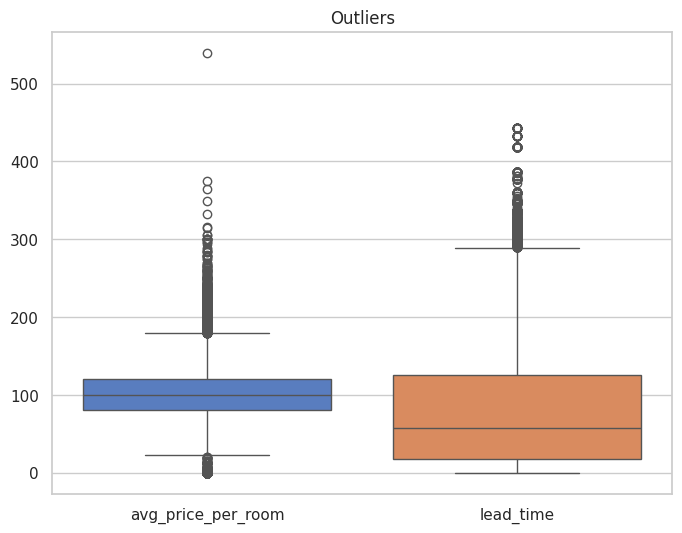

In [109]:
# Seleccionar las columnas numéricas
columns = ['avg_price_per_room', 'lead_time']

# Crear un gráfico de boxplots para estas variables
plt.figure(figsize=(8,6))
sns.boxplot(data=df[columns], palette='muted')
plt.title('Outliers')
plt.show()

### Gráficos con Matplotlib

1. ¿Cuál es el porcentaje de reservas canceladas en comparación con las no canceladas?
  
Se busca visualizar la proporción de reservas que terminan siendo canceladas frente a las que son completadas.

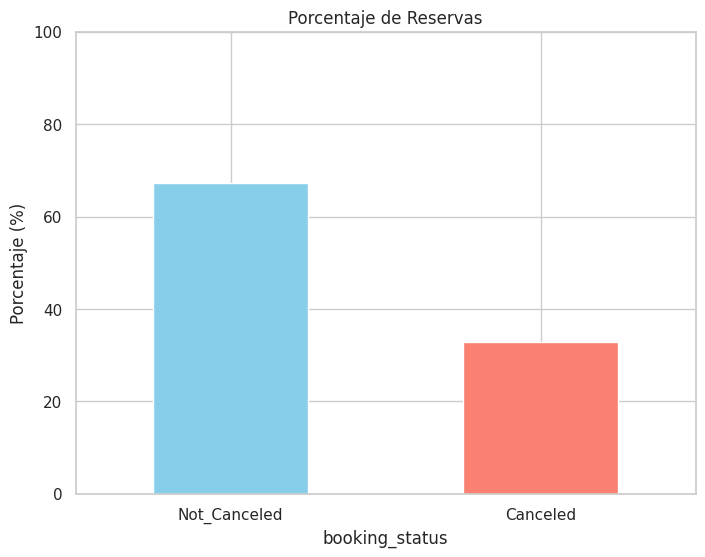

In [82]:
# Gráfico de barras para el porcentaje de reservas (Not_Canceled vs Canceled)
plt.figure(figsize=(8,6))  # Ajustar el tamaño de la figura
booking_status_counts = df['booking_status'].value_counts(normalize=True) * 100 # Porcentajes
booking_status_counts.plot(kind='bar', color=['skyblue', 'salmon'], rot=0)
plt.title('Porcentaje de Reservas')
plt.ylabel('Porcentaje (%)')
plt.ylim(0, 100)  # Asegurar que la escala del eje y vaya de 0 a 100 %
plt.show()

El número de cancelaciones es aproximadamente 2/3 partes del total, mientras que el número de reservas que se completan representa el 1/3 restante.

2. ¿El lead time (días de anticipación en la reserva) influye en la cancelación de una reserva?

La idea es analizar qué tanto influye la cantidad de días que hay entre la fecha de reserva y la fecha de llegada al hotel sobre la probabilidad de cancelación -> Los gráficos de violines son útiles para visualizar cómo varía la distribución para cada caso de la variable categórica.

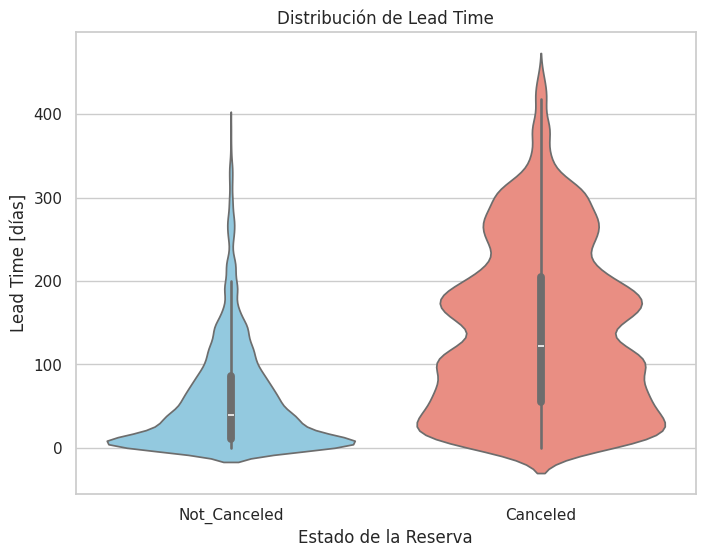

In [76]:
# Gráfico de violín para visualizar la distribución del lead time en función de la cancelación
plt.figure(figsize=(8,6))  # Ajustar el tamaño de la figura
sns.violinplot(x='booking_status', y='lead_time', data=df, hue='booking_status', palette=['skyblue', 'salmon'], legend=False)
plt.title('Distribución de Lead Time')
plt.xlabel('Estado de la Reserva')
plt.ylabel('Lead Time [días]')
plt.show()

Como se observa que la distribución para las reservas canceladas mantiene mayor densidad en la zona central de lead time, es posible concluir que las reservas realizadas con anticiáción media y alta son más susceptibles a cancelarse.

3. ¿Cómo se distribuyen los precios promedio de las habitaciones y su relación con las cancelaciones?

Se busca entender que rango de precios promedios son más frecuentes.

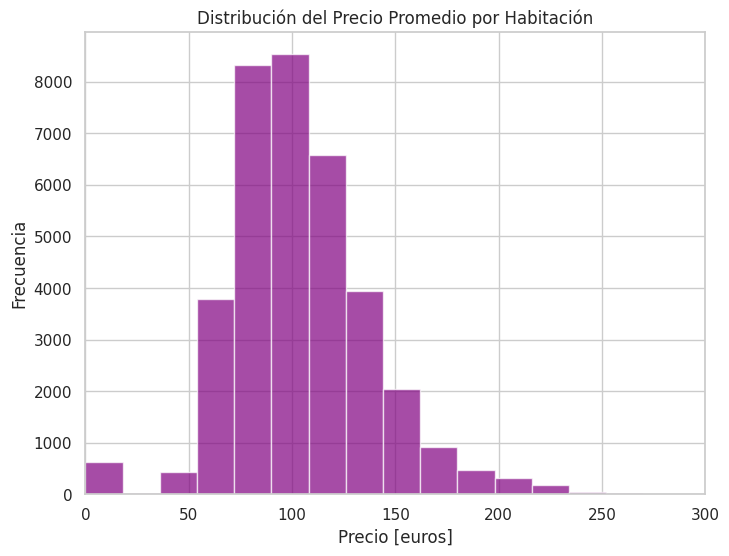

In [80]:
# Histograma para la distribución del precio promedio por habitación
plt.figure(figsize=(8,6))  # Ajustar el tamaño de la figura
plt.hist(df['avg_price_per_room'], bins=30, color='purple', alpha=0.7)
plt.title('Distribución del Precio Promedio por Habitación')
plt.xlabel('Precio [euros]')
plt.xlim(0, 300)  # Mejora el tamaño del área graficable
plt.ylabel('Frecuencia')
plt.show()

Con el histograma, puede deducirse que los precios medios, entre 75 y 125 euros aproximadamente, son lo más común y estable en cuanto a reservas concretadas. La distribución es centralizada y tiene una sutil cola hacia la derecha.

### Gráficos con Seaborn

4. ¿Los huéspedes que hacen solicitudes especiales tienen menos probabilidades de cancelar la reserva?

Se analiza si las solicitudes especiales constituyen un indicador del compromiso del huesped con la reserva.

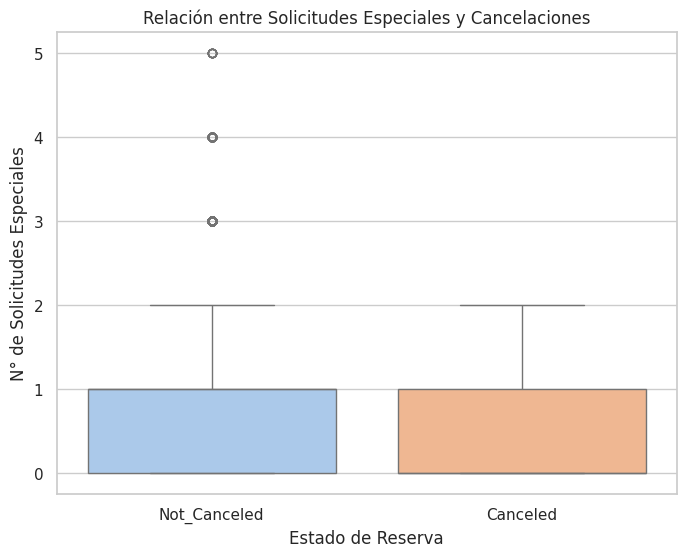

In [86]:
# Boxplot para analizar la relación entre el número de solicitudes especiales y las cancelaciones
plt.figure(figsize=(8,6))  # Ajustar el tamaño de la figura
sns.boxplot(x='booking_status', y='no_of_special_requests', hue='booking_status', data=df, palette='pastel', legend=False)
plt.title('Relación entre Solicitudes Especiales y Cancelaciones')
plt.xlabel('Estado de Reserva')
plt.ylabel('N° de Solicitudes Especiales')
plt.show()

El análisis con boxplot sugiere que no hay una relación clara entre el número de solicitudes especiales y la probabilidad de cancelación. La mediana y el rango intercuartílico son muy similares para ambas categorías de reserva. Se detectan algunos pocos outliers.

5. ¿Qué variables numéricas están más correlacionadas entre sí?

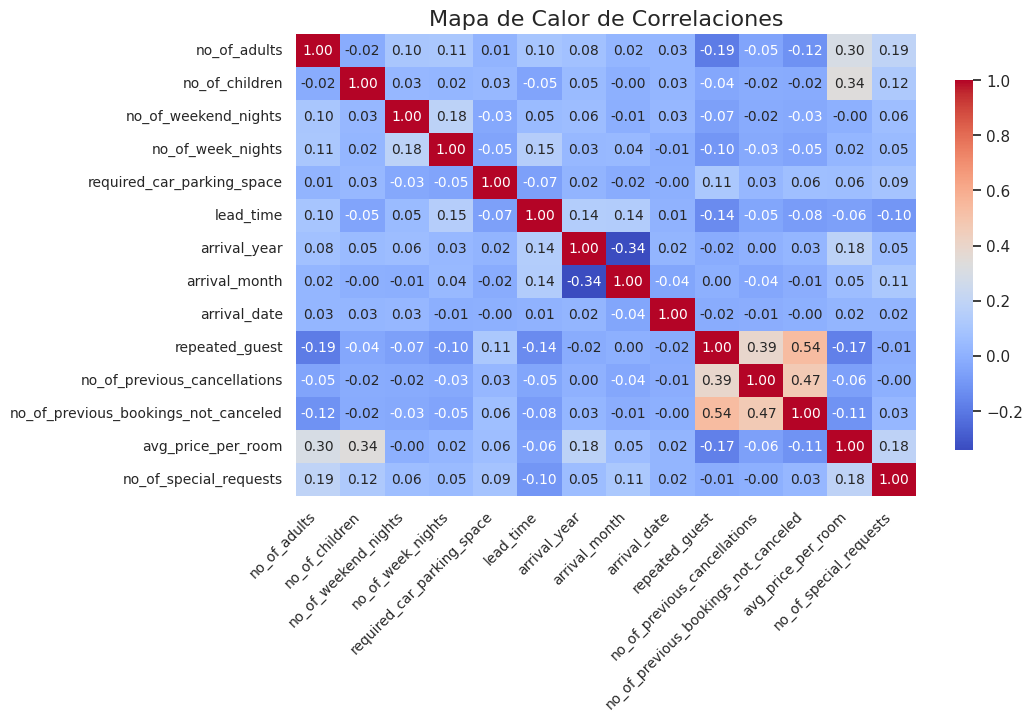

In [87]:
# Heatmap para visualizar las correlaciones entre todas las variables numéricas y el estado de la reserva
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})
plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar etiquetas del eje x
plt.yticks(fontsize=10)  # Ajustar tamaño de etiquetas del eje y
plt.show()

Este tipo de análisis multivariado permite analizar, por ejemplo, cómo ciertas características de las reservas, como el comportamiento de huéspedes recurrentes, el historial de cancelaciones, y el precio promedio por habitación, están relacionadas con el estado de las reservas.
Un resultado importante, y que a su vez tiene sentido, es que los clientes recurrentes tienden a completar más reservas sin cancelarlas.

6. ¿Cuál es la probabilidad de cancelación para los diferentes segmentos de mercado?

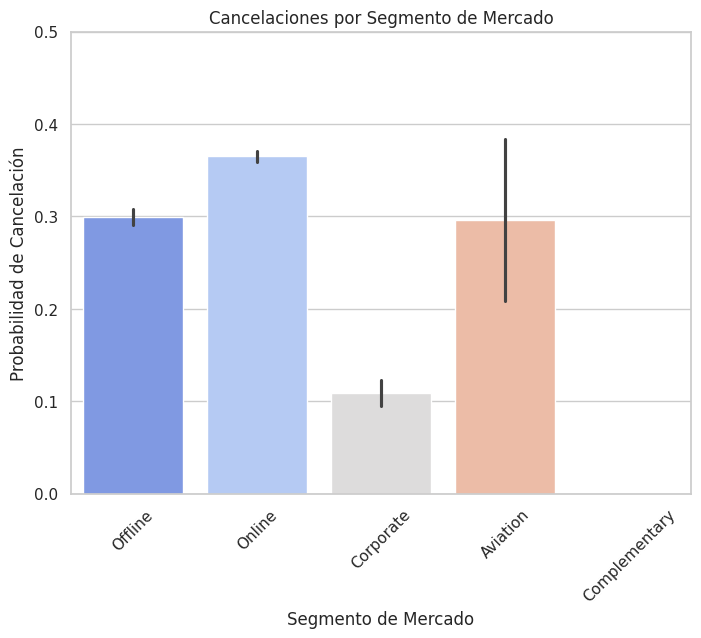

In [96]:
# Convertir el estado de la reserva a una variable numérica (1 = Canceled, 0 = No Canceled)
df['is_canceled'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# Gráfico de barras para comparar la tasa de cancelación según el segmento de mercado
plt.figure(figsize=(8, 6))  # Ajustar el tamaño de la figura
sns.barplot(x='market_segment_type', y='is_canceled', hue='market_segment_type', data=df, palette='coolwarm', legend=False)
plt.title('Cancelaciones por Segmento de Mercado')
plt.xlabel('Segmento de Mercado')
plt.ylabel('Probabilidad de Cancelación')
plt.ylim(0, 0.5)
plt.xticks(rotation=45)
plt.show()

Es posible notar que cada segmento tiene asociada una probabilidad de cancelación distinta de cero salvo "Complementary" (categoría sin reservas canceladas). Además, como "Online" tiene la barra más alta, las reservas realizadas por ese medio tienen la mayor probabilidad respecto al resto de ser canceladas.